In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from scipy.stats.mstats import gmean

In [ ]:
# 구글 마운트 시키기
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# 가중치 계산

In [ ]:
# 쌍대비교행렬
np01 = np.array([[1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [1, 1, 1, 1/2, 1/2, 1/2, 1/2, 1/3, 1/3, 1/3],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [2, 2, 2, 1, 1, 1, 1, 1/2, 1/2, 1/2],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1],
                 [3, 3, 3, 2, 2, 2, 2, 1, 1, 1]])

In [ ]:
print(np01)

[[1.         1.         1.         0.5        0.5        0.5
  0.5        0.33333333 0.33333333 0.33333333]
 [1.         1.         1.         0.5        0.5        0.5
  0.5        0.33333333 0.33333333 0.33333333]
 [1.         1.         1.         0.5        0.5        0.5
  0.5        0.33333333 0.33333333 0.33333333]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [2.         2.         2.         1.         1.         1.
  1.         0.5        0.5        0.5       ]
 [3.         3.         3.         2.         2.         2.
  2.         1.         1.         1.        ]
 [3.         3.         3.         2.         2.         2.
  2.         1.         1.         1.        ]
 [3.         3.         3.        

In [ ]:
np02 = np.dot(np01, np01)

In [ ]:
print(np02)

[[10.  10.  10.   5.5  5.5  5.5  5.5  3.   3.   3. ]
 [10.  10.  10.   5.5  5.5  5.5  5.5  3.   3.   3. ]
 [10.  10.  10.   5.5  5.5  5.5  5.5  3.   3.   3. ]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [18.5 18.5 18.5 10.  10.  10.  10.   5.5  5.5  5.5]
 [34.  34.  34.  18.5 18.5 18.5 18.5 10.  10.  10. ]
 [34.  34.  34.  18.5 18.5 18.5 18.5 10.  10.  10. ]
 [34.  34.  34.  18.5 18.5 18.5 18.5 10.  10.  10. ]]


In [ ]:
np03 = np02.sum(axis=0)

In [ ]:
print(np03)

[206. 206. 206. 112. 112. 112. 112.  61.  61.  61.]


In [ ]:
np04 = np03/np03.sum()

### 가중치 계산 결과 

In [ ]:
print(np04)

[0.16493195 0.16493195 0.16493195 0.08967174 0.08967174 0.08967174
 0.08967174 0.04883907 0.04883907 0.04883907]


In [ ]:
# 차례대로 생활인구, 불법주정차 건수, 주차장면수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

# 주차수요 계산

### 데이터 전처리

In [ ]:
# 데이터 불러오기
EA = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_외식점포수_최종.csv", encoding = 'cp949')
SE = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_소매업점포수_최종.csv", encoding = 'cp949')
SV = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_서비스업점포수_최종.csv", encoding = 'cp949')
CA = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_자동차등록대수_최종.csv", encoding = 'cp949')
GE = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/202212_중구_세대수_최종.csv", encoding = 'cp949')
AR = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_동별면적수_최종.csv", encoding = 'cp949')
PO = pd.read_csv("/content/gdrive/MyDrive/2023-1 DScover_스터디_프로젝트/Data/주차수요분석용 데이터/중구_주민등록인구수_최종.csv", encoding = 'cp949')

In [ ]:
df = pd.concat([EA, SE, SV, CA, GE, AR, PO], axis=1)
df

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수
0,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228
1,회현동,657,회현동,4350,회현동,305,중구 회현동,10710,서울특별시 중구 회현동(1114054000),2561,회현동,0.84,회현동,4506
2,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728
3,필동,493,필동,384,필동,299,중구 필동,2125,서울특별시 중구 필동(1114057000),2431,필동,1.14,필동,3938
4,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577
5,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429
6,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674
7,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607
8,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486
9,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347


In [ ]:
df1= df.sort_values(by='읍면동')

In [ ]:
df1 = df1.reset_index(drop=True)
df1

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수
0,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429
1,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486
2,동화동,130,동화동,336,동화동,175,중구 동화동,2949,서울특별시 중구 동화동(1114066500),3989,동화동,0.26,동화동,10033
3,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728
4,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228
5,신당5동,267,신당5동,347,신당5동,189,중구 신당5동,2932,서울특별시 중구 신당제5동(1114065000),5334,신당5동,0.39,신당5동,10127
6,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607
7,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347
8,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674
9,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577


### 생활인구 계산

In [ ]:
map_data = {"dong":["소공동","회현동","명동","필동","장충동","광희동","을지로동","신당동",
                         "다산동","약수동","청구동","동화동","황학동","중림동","신당5동"],
            "day":[691800000,616600000,870700000,238700000,185900000,402700000,383300000,279200000,167200000,123600000,
                   98320000,99670000,123200000,123200000,314577900],
            "night":[92720000,83720000,118100000,82170000,84360000,179500000,90470000,156580000,
                     150700000,153900000,126300000,108600000,14300000,14300000,103980000]}
Map_data = pd.DataFrame(map_data)
Map_data = Map_data.sort_values("dong")
Map_data = Map_data.reset_index(drop=True)
Map_data
# 신당5동 데이터가 결측치라 평균값으로 메꿈

,dong,day,night
0,광희동,402700000,179500000
1,다산동,167200000,150700000
2,동화동,99670000,108600000
3,명동,870700000,118100000
4,소공동,691800000,92720000
5,신당5동,314577900,103980000
6,신당동,279200000,156580000
7,약수동,123600000,153900000
8,을지로동,383300000,90470000
9,장충동,185900000,84360000


### 생활인구 단위 조절

In [ ]:
Map_data['day'] = Map_data['day']/10000
Map_data['day']

0     40270.00
1     16720.00
2      9967.00
3     87070.00
4     69180.00
5     31457.79
6     27920.00
7     12360.00
8     38330.00
9     18590.00
10    12320.00
11     9832.00
12    23870.00
13    12320.00
14    61660.00
Name: day, dtype: float64

In [ ]:
Map_data['night'] = Map_data['night']/10000
Map_data['night']

0     17950.0
1     15070.0
2     10860.0
3     11810.0
4      9272.0
5     10398.0
6     15658.0
7     15390.0
8      9047.0
9      8436.0
10     1430.0
11    12630.0
12     8217.0
13     1430.0
14     8372.0
Name: night, dtype: float64

In [ ]:
df2 = pd.concat([df1, Map_data], axis=1)
df2

,동이름,외식점포수,동이름,소매업점포수,동이름,서비스업점포수,읍면동,합계,행정구역,2022년12월_전체세대,행정구역,면적(㎢),행정구역,인구수,dong,day,night
0,광희동,766,광희동,4557,광희동,520,중구 광희동,2570,서울특별시 중구 광희동(1114059000),3424,광희동,0.74,광희동,5429,광희동,40270.00,17950.0
1,다산동,239,다산동,464,다산동,218,중구 다산동,3398,서울특별시 중구 다산동(1114062500),6821,다산동,0.51,다산동,13486,다산동,16720.00,15070.0
2,동화동,130,동화동,336,동화동,175,중구 동화동,2949,서울특별시 중구 동화동(1114066500),3989,동화동,0.26,동화동,10033,동화동,9967.00,10860.0
3,명동,1458,명동,1990,명동,1432,중구 명동,7195,서울특별시 중구 명동(1114055000),1457,명동,0.99,명동,2728,명동,87070.00,11810.0
4,소공동,837,소공동,913,소공동,838,중구 소공동,3421,서울특별시 중구 소공동(1114052000),1286,소공동,0.95,소공동,2228,소공동,69180.00,9272.0
5,신당5동,267,신당5동,347,신당5동,189,중구 신당5동,2932,서울특별시 중구 신당제5동(1114065000),5334,신당5동,0.39,신당5동,10127,신당5동,31457.79,10398.0
6,신당동,361,신당동,7445,신당동,302,중구 신당동,3513,서울특별시 중구 신당동(1114061500),4808,신당동,0.55,신당동,7607,신당동,27920.00,15658.0
7,약수동,145,약수동,248,약수동,246,중구 약수동,4748,서울특별시 중구 약수동(1114063500),7779,약수동,0.48,약수동,16347,약수동,12360.00,15390.0
8,을지로동,731,을지로동,1816,을지로동,441,중구 을지로동,1596,서울특별시 중구 을지로동(1114060500),1297,을지로동,0.60,을지로동,1674,을지로동,38330.00,9047.0
9,장충동,148,장충동,224,장충동,102,중구 장충동,1297,서울특별시 중구 장충동(1114058000),2829,장충동,1.36,장충동,4577,장충동,18590.00,8436.0


In [ ]:
df2.columns

Index(['동이름', '외식점포수', '동이름', '소매업점포수', '동이름', '서비스업점포수', '읍면동', '합계', '행정구역',
       '2022년12월_전체세대', '행정구역', '면적(㎢)', '행정구역', '인구수', 'dong', 'day',
       'night'],
      dtype='object')

In [ ]:
df2.columns = ['dong', 'eating', 'dong1', 'selling', 'dong2', 'service', 'dong3', 'car', 'dong4', 'generation',
       'dong5', 'area', 'dong6', 'population', 'dong7', 'day', 'night']

In [ ]:
df2.columns

Index(['dong', 'eating', 'dong1', 'selling', 'dong2', 'service', 'dong3',
       'car', 'dong4', 'generation', 'dong5', 'area', 'dong6', 'population',
       'dong7', 'day', 'night'],
      dtype='object')

In [ ]:
df3 = df2.drop(['dong1', 'dong2', 'dong3', 'dong4', 'dong5', 'dong6', 'dong7' ],axis = 1)

In [ ]:
df3

,dong,eating,selling,service,car,generation,area,population,day,night
0,광희동,766,4557,520,2570,3424,0.74,5429,40270.00,17950.0
1,다산동,239,464,218,3398,6821,0.51,13486,16720.00,15070.0
2,동화동,130,336,175,2949,3989,0.26,10033,9967.00,10860.0
3,명동,1458,1990,1432,7195,1457,0.99,2728,87070.00,11810.0
4,소공동,837,913,838,3421,1286,0.95,2228,69180.00,9272.0
5,신당5동,267,347,189,2932,5334,0.39,10127,31457.79,10398.0
6,신당동,361,7445,302,3513,4808,0.55,7607,27920.00,15658.0
7,약수동,145,248,246,4748,7779,0.48,16347,12360.00,15390.0
8,을지로동,731,1816,441,1596,1297,0.60,1674,38330.00,9047.0
9,장충동,148,224,102,1297,2829,1.36,4577,18590.00,8436.0


### 주차 구획 데이터

In [ ]:
parking_size = pd.DataFrame({"동명":["광희동","다산동","동화동","명동","신당5동",
                                     "신당동","약수동","을지로동","장충동","중림동",
                                     "청구동","필동","회현동","소공동","황학동"], 
                            "구획수":[32,67,27,5,39,36,2,25,67,40,61,130,8,37,13]})
parking_size = parking_size.sort_values("동명")
parking_size = parking_size.reset_index(drop=True)
parking_size
# 소공동 데이터가 결측치라 평균값으로 메꿈

,동명,구획수
0,광희동,32
1,다산동,67
2,동화동,27
3,명동,5
4,소공동,37
5,신당5동,39
6,신당동,36
7,약수동,2
8,을지로동,25
9,장충동,67


In [ ]:
df4 = pd.concat([df3, parking_size], axis=1)
df4

,dong,eating,selling,service,car,generation,area,population,day,night,동명,구획수
0,광희동,766,4557,520,2570,3424,0.74,5429,40270.00,17950.0,광희동,32
1,다산동,239,464,218,3398,6821,0.51,13486,16720.00,15070.0,다산동,67
2,동화동,130,336,175,2949,3989,0.26,10033,9967.00,10860.0,동화동,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,87070.00,11810.0,명동,5
4,소공동,837,913,838,3421,1286,0.95,2228,69180.00,9272.0,소공동,37
5,신당5동,267,347,189,2932,5334,0.39,10127,31457.79,10398.0,신당5동,39
6,신당동,361,7445,302,3513,4808,0.55,7607,27920.00,15658.0,신당동,36
7,약수동,145,248,246,4748,7779,0.48,16347,12360.00,15390.0,약수동,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,38330.00,9047.0,을지로동,25
9,장충동,148,224,102,1297,2829,1.36,4577,18590.00,8436.0,장충동,67


In [ ]:
df5 = df4.drop('동명', axis=1)

In [ ]:
df5.columns

Index(['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', '구획수'],
      dtype='object')

In [ ]:
df5.columns = ['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area','population', 'day', 'night', 'parking_size']

In [ ]:
df6 = df5.copy()

### 데이터 처리 완료

In [ ]:
df6

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,766,4557,520,2570,3424,0.74,5429,40270.00,17950.0,32
1,다산동,239,464,218,3398,6821,0.51,13486,16720.00,15070.0,67
2,동화동,130,336,175,2949,3989,0.26,10033,9967.00,10860.0,27
3,명동,1458,1990,1432,7195,1457,0.99,2728,87070.00,11810.0,5
4,소공동,837,913,838,3421,1286,0.95,2228,69180.00,9272.0,37
5,신당5동,267,347,189,2932,5334,0.39,10127,31457.79,10398.0,39
6,신당동,361,7445,302,3513,4808,0.55,7607,27920.00,15658.0,36
7,약수동,145,248,246,4748,7779,0.48,16347,12360.00,15390.0,2
8,을지로동,731,1816,441,1596,1297,0.60,1674,38330.00,9047.0,25
9,장충동,148,224,102,1297,2829,1.36,4577,18590.00,8436.0,67


In [ ]:
# 0.16493195 0.16493195 0.16493195 0.08967174 0.08967174 0.08967174 0.08967174 0.04883907 0.04883907 0.04883907
# 차례대로 생활인구, 불법주정차 건수, 주차장면수, 
# 외식업 점포수, 소매업 점포수, 서비스업 점포수, 차량등록대수
# 세대수, 자치구 면적, 총인구수

In [ ]:
df6.columns

Index(['dong', 'eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size'],
      dtype='object')

### 가중치 곱하기

In [ ]:
df6['eating'] = df6['eating'] * 0.08967174 
df6['selling'] = df6['selling'] * 0.08967174 
df6['service'] = df6['service'] * 0.08967174 
df6['car'] = df6['car'] * 0.08967174 
df6['generation'] = df6['generation'] * 0.04883907
df6['area'] = df6['area'] * 0.04883907
df6['population'] = df6['population'] * 0.04883907
df6['day'] = df6['day'] * 0.16493195
df6['night'] = df6['night'] * 0.16493195
df6['parking_size'] = df6['parking_size'] * 0.16493195

In [ ]:
df6

,dong,eating,selling,service,car,generation,area,population,day,night,parking_size
0,광희동,68.688553,408.634119,46.629305,230.456372,167.224976,0.036141,265.147311,6641.809626,2960.528502,5.277822
1,다산동,21.431546,41.607687,19.548439,304.704573,333.131296,0.024908,658.643698,2757.662204,2485.524486,11.050441
2,동화동,11.657326,30.129705,15.692554,264.441961,194.819050,0.012698,490.002389,1643.876746,1791.160977,4.453163
3,명동,130.741397,178.446763,128.409932,645.188169,71.158525,0.048351,133.232983,14360.624886,1947.846329,0.824660
4,소공동,75.055246,81.870299,75.144918,306.767023,62.807044,0.046397,108.813448,11409.992301,1529.249040,6.102482
5,신당5동,23.942355,31.116094,16.947959,262.917542,260.507599,0.019047,494.593262,5188.394647,1714.962416,6.432346
6,신당동,32.371498,667.606104,27.080865,315.016823,234.818249,0.026861,371.518805,4604.900044,2582.504473,5.937550
7,약수동,13.002402,22.238592,22.059248,425.761422,379.919126,0.023443,798.372277,2038.558902,2538.302711,0.329864
8,을지로동,65.550042,162.843880,39.545237,143.116097,63.344274,0.029303,81.756603,6321.841643,1492.139352,4.123299
9,장충동,13.271418,20.086470,9.146517,116.304247,138.165729,0.066421,223.536423,3066.084951,1391.365930,11.050441


In [ ]:
df6 = df6.set_index('dong')

In [ ]:
df6

,eating,selling,service,car,generation,area,population,day,night,parking_size
dong,,,,,,,,,,
광희동,68.688553,408.634119,46.629305,230.456372,167.224976,0.036141,265.147311,6641.809626,2960.528502,5.277822
다산동,21.431546,41.607687,19.548439,304.704573,333.131296,0.024908,658.643698,2757.662204,2485.524486,11.050441
동화동,11.657326,30.129705,15.692554,264.441961,194.819050,0.012698,490.002389,1643.876746,1791.160977,4.453163
명동,130.741397,178.446763,128.409932,645.188169,71.158525,0.048351,133.232983,14360.624886,1947.846329,0.824660
소공동,75.055246,81.870299,75.144918,306.767023,62.807044,0.046397,108.813448,11409.992301,1529.249040,6.102482
신당5동,23.942355,31.116094,16.947959,262.917542,260.507599,0.019047,494.593262,5188.394647,1714.962416,6.432346
신당동,32.371498,667.606104,27.080865,315.016823,234.818249,0.026861,371.518805,4604.900044,2582.504473,5.937550
약수동,13.002402,22.238592,22.059248,425.761422,379.919126,0.023443,798.372277,2038.558902,2538.302711,0.329864
을지로동,65.550042,162.843880,39.545237,143.116097,63.344274,0.029303,81.756603,6321.841643,1492.139352,4.123299


In [ ]:
df6.columns

Index(['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'night', 'parking_size'],
      dtype='object')

### 낮밤 따로 계산

In [ ]:
df_day = df6[['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'day', 'parking_size']]
df_night = df6[['eating', 'selling', 'service', 'car', 'generation', 'area',
       'population', 'night', 'parking_size']]

In [ ]:
df_day_demand = df_day.sum(axis=1)
df_night_demand = df_night.sum(axis=1)

# 주차수급률 계산

### 동별 주차면수

In [ ]:
parking_size.columns = ['dong', 'parking_size']

In [ ]:
parking_size = parking_size.set_index('dong')

In [ ]:
df_final = pd.concat([parking_size, df_day_demand, df_night_demand], axis=1)
df_final

,parking_size,0,1
dong,,,
광희동,32,7833.904225,4152.623101
다산동,67,4147.804792,3875.667075
동화동,27,2655.085593,2802.369824
명동,5,15648.675665,3235.897108
소공동,37,12126.599158,2245.855897
신당5동,39,6284.870851,2811.438620
신당동,36,6259.276800,4236.881229
약수동,2,3700.265275,4200.009083
을지로동,25,6882.150379,2052.448087


In [ ]:
df_final['df_day_percent'] = df_final['parking_size'] / df_final[0]
df_final['df_night_percent'] = df_final['parking_size'] / df_final[1]

In [ ]:
df_final.columns

Index(['parking_size', 0, 1, 'df_day_percent', 'df_night_percent'], dtype='object')

### 최종 데이터 

In [ ]:
df_final.columns = ['parking_size', 'df_day_demand', 'df_night_demand', 'df_day_percent', 'df_night_percent']

In [ ]:
df_final

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent
dong,,,,,
광희동,32,7833.904225,4152.623101,0.004085,0.007706
다산동,67,4147.804792,3875.667075,0.016153,0.017287
동화동,27,2655.085593,2802.369824,0.010169,0.009635
명동,5,15648.675665,3235.897108,0.000320,0.001545
소공동,37,12126.599158,2245.855897,0.003051,0.016475
신당5동,39,6284.870851,2811.438620,0.006205,0.013872
신당동,36,6259.276800,4236.881229,0.005751,0.008497
약수동,2,3700.265275,4200.009083,0.000541,0.000476
을지로동,25,6882.150379,2052.448087,0.003633,0.012181


# 주차수급률 시각화

In [ ]:
import matplotlib.pyplot as plt #그래프 그리기 위한 라이브러리
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import folium
import json
import urllib.request
import requests

In [ ]:
#글꼴을 위한 나눔 폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (12.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122519 files and dir

In [ ]:
plt.rc('font', family = 'NanumBarunGothic') #나눔 폰트 사용

In [ ]:
'''
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
'''

'\nfrom matplotlib import font_manager, rc\nfont_path = "C:/Windows/Fonts/NGULIM.TTF"\nfont = font_manager.FontProperties(fname=font_path).get_name()\nrc(\'font\', family=font)\n'

In [ ]:
dong_list = ["광희동","다산동","동화동","명동","신당5동","신당동","약수동","을지로동","장충동","중림동", "청구동","필동","회현동","소공동","황학동"]

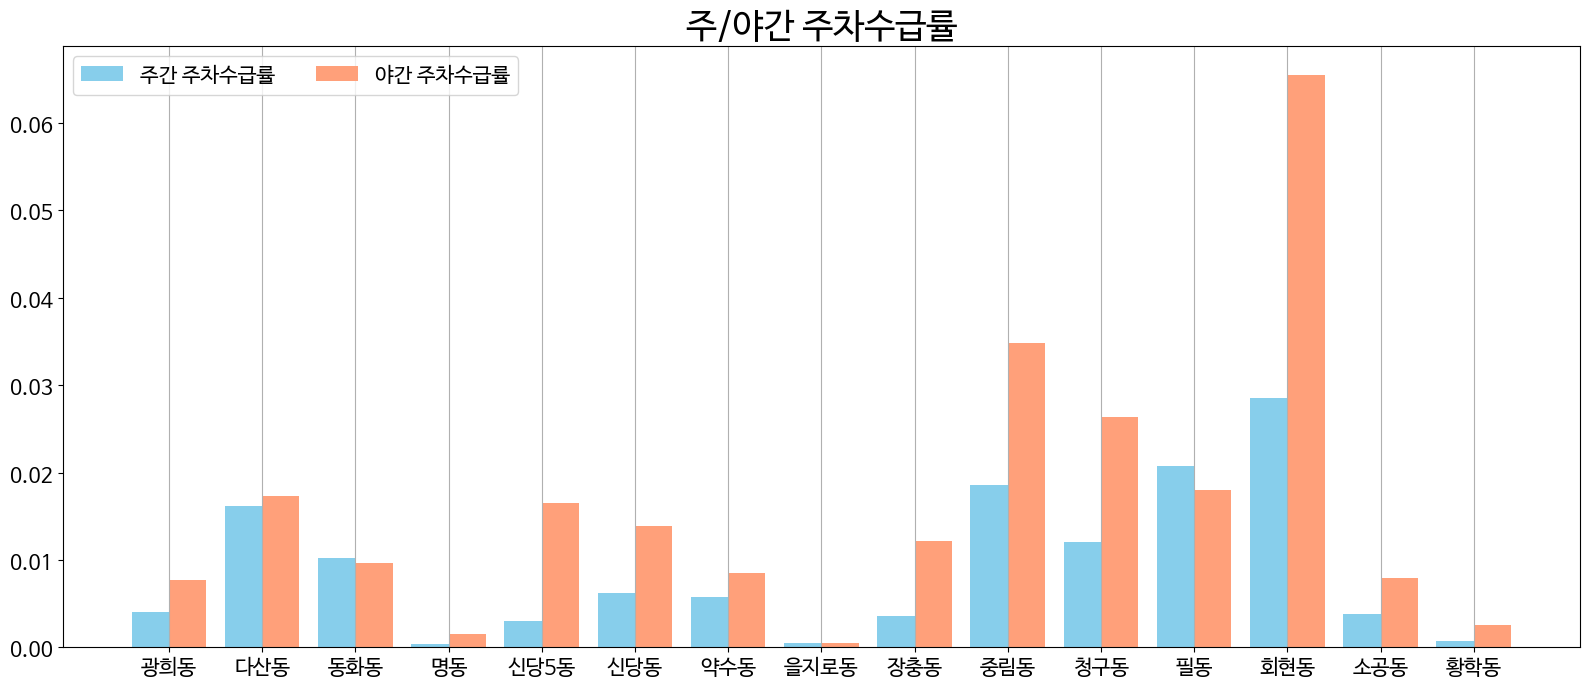

In [ ]:
np.random.seed(0)
N = 2
WIDTH = 0.8
BAR_WIDTH = WIDTH/N

n_data = 15
data1 = df_final['df_day_percent']
data2 = df_final['df_night_percent']
data_idx = np.arange(n_data)

fig, ax = plt.subplots(figsize=(16, 7))
xticks = dong_list
plt.xticks(np.arange(0, 15, 1), labels=dong_list)
plt.title('주/야간 주차수급률', fontsize=25)
ax.grid(axis='x')
ax.tick_params(labelsize=15)


ax.bar(data_idx - BAR_WIDTH/2, data1, width=BAR_WIDTH, label='주간 주차수급률', color = 'skyblue')
ax.bar(data_idx + BAR_WIDTH/2, data2, width=BAR_WIDTH, label='야간 주차수급률', color = 'lightsalmon')

ax.legend(loc='upper left', fontsize=15, ncol=2)

plt.tight_layout()

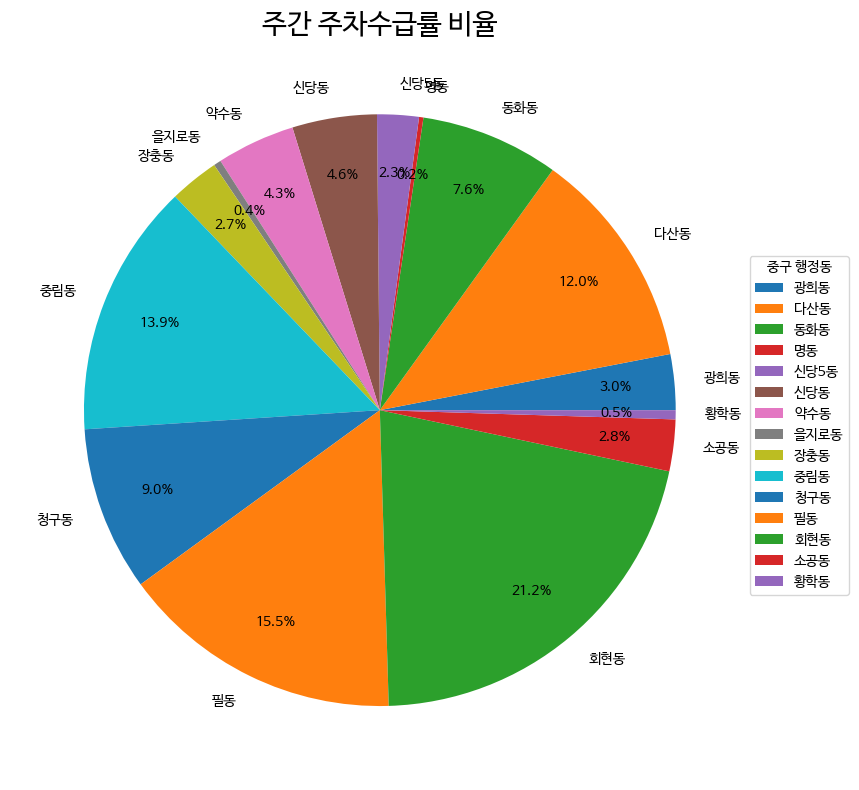

In [ ]:
# 원본
plt.figure(figsize = (13, 8))
plt.pie(df_final['df_day_percent']*100, labels  = dong_list, autopct = '%.1f%%', pctdistance = 0.8)
plt.title('주간 주차수급률 비율', size= 20)
plt.legend(dong_list, loc =(1, 0.25), title = '중구 행정동')
plt.tight_layout()
plt.show()

In [ ]:
df_final['df_day_percent']

dong
광희동     0.004085
다산동     0.016153
동화동     0.010169
명동      0.000320
소공동     0.003051
신당5동    0.006205
신당동     0.005751
약수동     0.000541
을지로동    0.003633
장충동     0.018623
중림동     0.012067
청구동     0.020763
필동      0.028475
황학동     0.003783
회현동     0.000669
Name: df_day_percent, dtype: float64

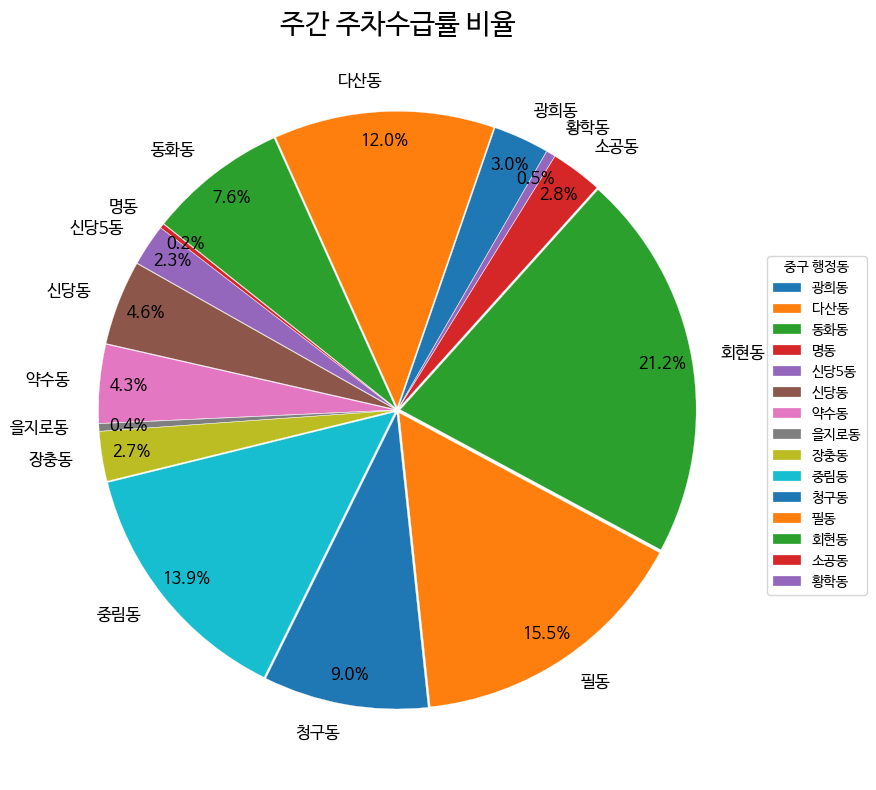

In [ ]:
plt.figure(figsize = (13, 8))
textprops = dict(weight = 3, color = 'black', size = 12)
wedgeprops={ 'edgecolor': 'w', 'linewidth': 0.2}
explode = [0.01] * len(df_final['df_day_percent'])
plt.pie(df_final['df_day_percent']*100, labels  = dong_list, startangle = 60,
        autopct = '%.1f%%', pctdistance = 0.9, 
        explode = explode, textprops = textprops, wedgeprops = wedgeprops)
plt.title('주간 주차수급률 비율', size= 20)
plt.legend(dong_list, loc =(1, 0.25), title = '중구 행정동')
plt.tight_layout()
plt.show()

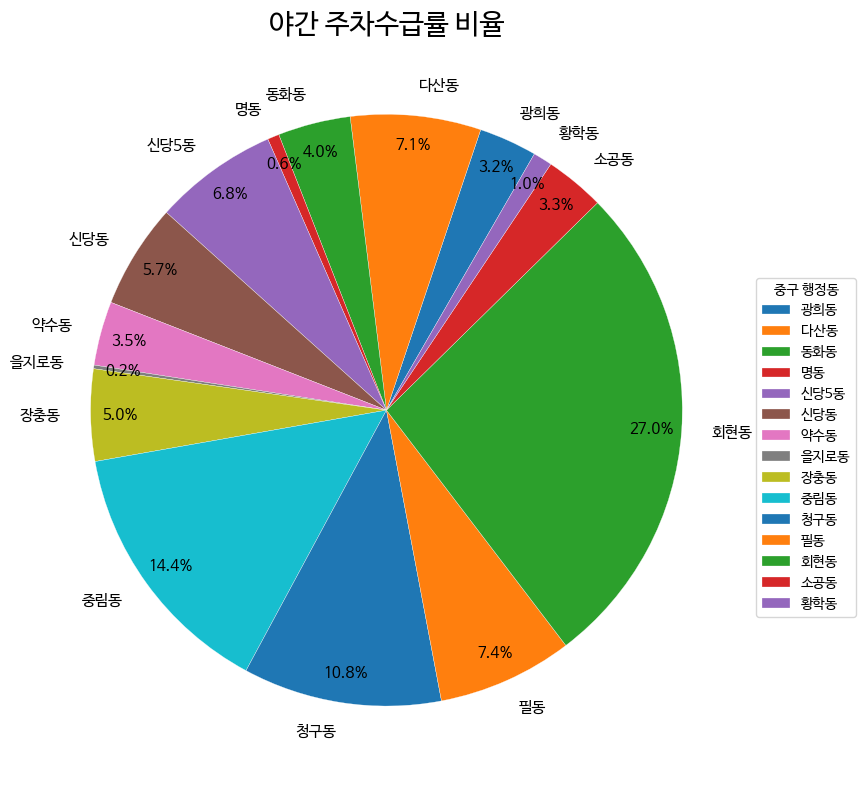

In [ ]:
plt.figure(figsize = (13, 8))
textprops = dict(weight = 3, color = 'black', size = 11)
wedgeprops={ 'edgecolor': 'w', 'linewidth': 0.2}
plt.pie(df_final['df_night_percent']*100, labels  = dong_list, autopct = '%.1f%%', 
        wedgeprops = wedgeprops , startangle = 60,
        textprops = textprops,
        pctdistance = 0.9, shadow = False)
plt.title('야간 주차수급률 비율', size= 20)
plt.legend(dong_list, loc =(1, 0.22), title = '중구 행정동' )
plt.tight_layout()
plt.show()

In [ ]:
url = "https://raw.githubusercontent.com/vuski/admdongkor/master/ver20230101/HangJeongDong_ver20230101.geojson"
text_data = urllib.request.urlopen(url).read().decode('utf-8')
geo = json.loads(text_data)

In [ ]:
type(geo)

dict

In [ ]:
df_final.index

Index(['광희동', '다산동', '동화동', '명동', '소공동', '신당5동', '신당동', '약수동', '을지로동', '장충동',
       '중림동', '청구동', '필동', '황학동', '회현동'],
      dtype='object', name='dong')

In [ ]:
df_final

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent
dong,,,,,
광희동,32,7833.904225,4152.623101,0.004085,0.007706
다산동,67,4147.804792,3875.667075,0.016153,0.017287
동화동,27,2655.085593,2802.369824,0.010169,0.009635
명동,5,15648.675665,3235.897108,0.000320,0.001545
소공동,37,12126.599158,2245.855897,0.003051,0.016475
신당5동,39,6284.870851,2811.438620,0.006205,0.013872
신당동,36,6259.276800,4236.881229,0.005751,0.008497
약수동,2,3700.265275,4200.009083,0.000541,0.000476
을지로동,25,6882.150379,2052.448087,0.003633,0.012181


In [ ]:
df_final.dtypes

parking_size          int64
df_day_demand       float64
df_night_demand     float64
df_day_percent      float64
df_night_percent    float64
dtype: object

In [ ]:
df_final1 = df_final
df_final1["dong_full"] = ['중구 광희동', '중구 다산동', '중구 동화동', 
                          '중구 명동', '중구 소공동', '중구 신당5동', 
                          '중구 신당동', '중구 약수동', '중구 을지로동', 
                          '중구 장충동', '중구 중림동', '중구 청구동', 
                          '중구 필동', '중구 황학동', '중구 회현동']
df_final1                         

,parking_size,df_day_demand,df_night_demand,df_day_percent,df_night_percent,dong_full
dong,,,,,,
광희동,32,7833.904225,4152.623101,0.004085,0.007706,중구 광희동
다산동,67,4147.804792,3875.667075,0.016153,0.017287,중구 다산동
동화동,27,2655.085593,2802.369824,0.010169,0.009635,중구 동화동
명동,5,15648.675665,3235.897108,0.000320,0.001545,중구 명동
소공동,37,12126.599158,2245.855897,0.003051,0.016475,중구 소공동
신당5동,39,6284.870851,2811.438620,0.006205,0.013872,중구 신당5동
신당동,36,6259.276800,4236.881229,0.005751,0.008497,중구 신당동
약수동,2,3700.265275,4200.009083,0.000541,0.000476,중구 약수동
을지로동,25,6882.150379,2052.448087,0.003633,0.012181,중구 을지로동


In [ ]:
df_final2 = df_final1.set_index(["dong_full"])
df_final2.index

Index(['중구 광희동', '중구 다산동', '중구 동화동', '중구 명동', '중구 소공동', '중구 신당5동', '중구 신당동',
       '중구 약수동', '중구 을지로동', '중구 장충동', '중구 중림동', '중구 청구동', '중구 필동', '중구 황학동',
       '중구 회현동'],
      dtype='object', name='dong_full')

In [ ]:
df_final2.dtypes

parking_size          int64
df_day_demand       float64
df_night_demand     float64
df_day_percent      float64
df_night_percent    float64
dtype: object

# 중구에 text넣기

In [ ]:
junggu_hjd = df_final1["dong_full"]
print(junggu_hjd)

dong
광희동      중구 광희동
다산동      중구 다산동
동화동      중구 동화동
명동        중구 명동
소공동      중구 소공동
신당5동    중구 신당5동
신당동      중구 신당동
약수동      중구 약수동
을지로동    중구 을지로동
장충동      중구 장충동
중림동      중구 중림동
청구동      중구 청구동
필동        중구 필동
황학동      중구 황학동
회현동      중구 회현동
Name: dong_full, dtype: object


In [ ]:
import geopy

In [ ]:
# geopy 라이브러리를 import 해주어야 함 
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea') 
# user_agent='South Korea' 한글주소를 지오코딩 할 수 있음

In [ ]:
# 위도, 경도값을 반환하는 함수 생성. 
def geocoding(r_add):
 geo = geo_local.geocode(r_add)
 x_y = [geo.latitude, geo.longitude] # 주소에 맞는 위도 경도를 [x, y] 형태의 리스트로 반환해라
 return x_y

In [ ]:
latitude = []
longitude= []
for i in junggu_hjd:
 latitude.append(geocoding(i)[0])
 longitude.append(geocoding(i)[1])


In [ ]:
locs = pd.DataFrame({'주소' :  junggu_hjd,
                     '위도' : latitude,
                     '경도' : longitude})
locs

,주소,위도,경도
dong,,,
광희동,중구 광희동,37.565563,127.007140
다산동,중구 다산동,37.554854,127.008070
동화동,중구 동화동,37.560769,127.017542
명동,중구 명동,37.560898,126.986376
소공동,중구 소공동,37.563659,126.979496
신당5동,중구 신당5동,37.563098,127.023029
신당동,중구 신당동,37.565197,127.013217
약수동,중구 약수동,37.549605,127.010108
을지로동,중구 을지로동,37.566419,126.996862


In [ ]:
locs_dict = {  '중구 광희동' : (37.565563, 127.007140),
             '중구 다산동' : (37.5548536, 127.00806994375606),
             '중구 동화동' : (37.56076865, 127.01754242531356),
             '중구 명동'  : (37.5608977, 26.9863762),
             '중구 소공동' : (37.5636592, 126.9794961),
             '중구 신당5동' : (37.5630982, 127.02302917950244),
             '중구 신당동' : (37.565196900000004, 127.01321661206495),
             '중구 약수동' : (37.549605400000004, 127.01010791943582),
             '중구 을지로동' :  (37.5664192, 126.9968622249919),
             '중구 장충동' : (37.55577485, 127.00297058462732),
             '중구 중림동' :  (37.5567609, 126.96630371330951),
             '중구 청구동' : (37.55658115, 127.01476532540082),
             '중구 필동' : (37.556779500000005,  126.99265768478287),
             '중구 황학동' : (37.5675499, 127.02172),
             '중구 회현동' : (37.5570967,  126.97622857990271)}


df_day_demand	df_night_demand	df_day_percent	df_night_percent

In [ ]:
import folium
from folium.features import DivIcon

In [ ]:
# parking_size
map = folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final2['parking_size'],
               columns = [ df_final2.index, df_final2['parking_size']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp',
               line_weight=1.5, # 경계선 굵기
               legend = 'parking size').add_to(map)

for key, value in locs_dict.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],  

        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(0, 0),
            # icon 좌 상단 위치 설정
            icon_anchor=(0, 0),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 1.3rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key + ': ' + str(df_final2.loc[key, 'parking_size'].sum())
            + "<br/><span style='color: blue; margin: 0px;'>: "
            + str(df_final2.loc[key, 'parking_size']) + '</span>'
            + '</b></div>',
        )).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# df_day_demand
map1 = folium.Map(location=[37.5639, 126.9953],   # 지도의 중심 위치(위도, 경도)
				 zoom_start=14,            # 0~18 단계
                 tiles='Stamen Toner') # Stamen Toner, Stamen Terrain, ...

# 지도에 영역 표시
folium.Choropleth(geo_data = geo,
               data = df_final2['df_day_demand'],
               columns = [ df_final2.index, df_final2['df_day_demand']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'properties.temp').add_to(map1)
map1

Output hidden; open in https://colab.research.google.com to view.